In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import pandas as pd 
import scipy as sp 
import time
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Imputer


from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [69]:
#removed date labels, layer, vrest, adaptation and sag amplitude from ephys features file
df_ephys = pd.read_csv('ephys_features_181122.csv')
pd.DataFrame(df_ephys).head()

,Fluorescence,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms)
0,NF,120.465310,64.435931,7.762294,0.300148,1125.000000,-32.834541,52.294680,0.432039
1,NF,231.269244,77.661610,17.960742,0.040000,8.928571,-26.719834,95.553920,0.877778
2,NF,123.167530,167.826516,20.670777,0.090909,110.000000,-32.505842,99.186744,0.918182
3,PV+,228.141043,31.488151,7.183740,0.099039,1144.999998,-37.653993,69.199307,0.405846
4,PV+,182.081957,48.163386,8.769684,0.101233,872.857142,-34.179112,65.848241,0.385768


In [70]:
#mean ephys features for each fluorescence group
df_ephys.groupby('Fluorescence').mean().round(2)

,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms)
Fluorescence,,,,,,,,
NF,173.12,113.05,18.33,0.10,254.51,-30.44,80.60,0.88
PV+,145.66,67.48,9.25,0.19,918.79,-34.20,65.77,0.40
SST+,226.28,76.81,16.41,0.05,430.88,-30.01,64.50,0.67


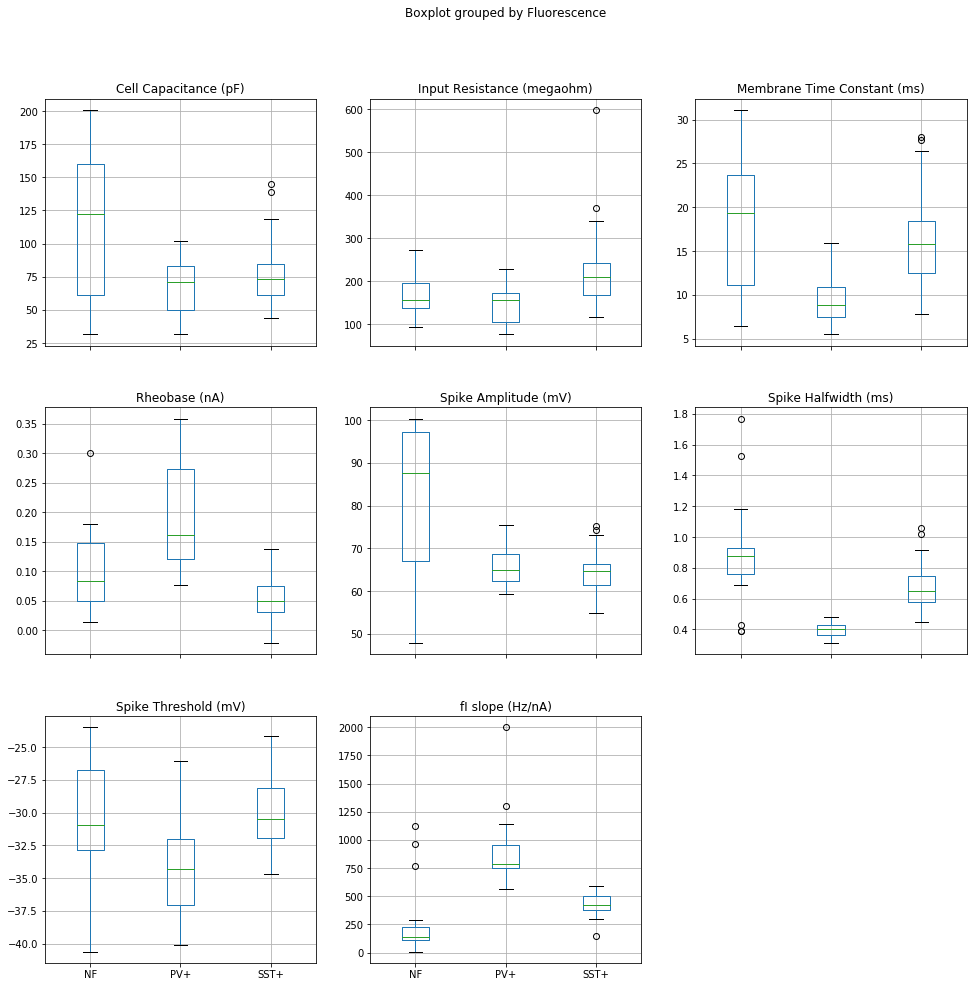

In [71]:
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(16,16),sharex=True,sharey=False)
bp= df_ephys.boxplot(by='Fluorescence',ax=np.ravel(axs)[:8])
axs[-1][-1].axis('off');
for ax in fig.axes:
    ax.set_xlabel('')
fig.subplots_adjust(hspace=0.25)
fig.savefig('ephys_features'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

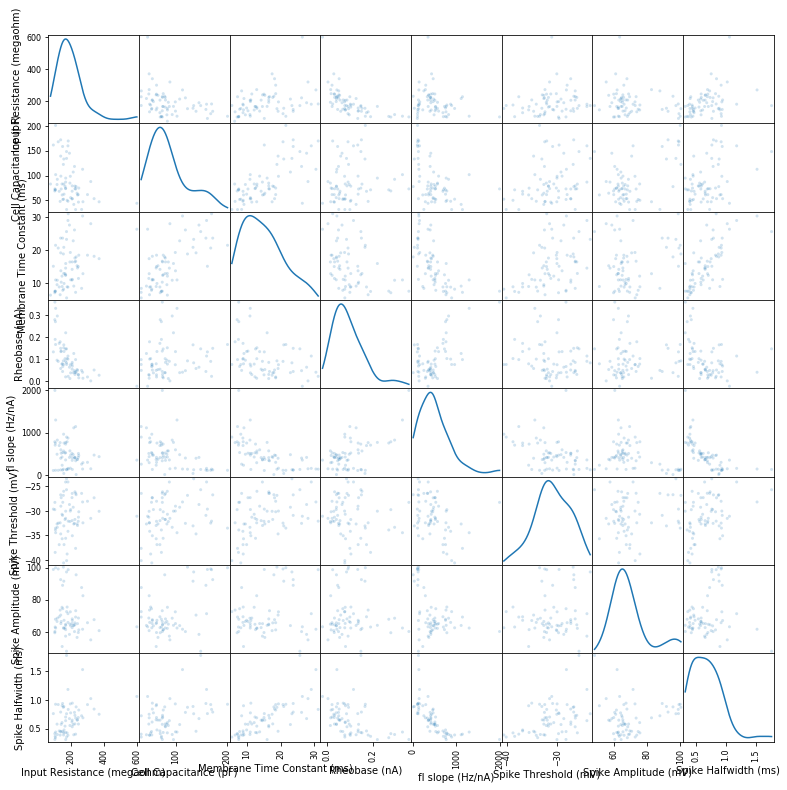

In [72]:
'''display which features are correlated with each other, based upon qualitative vis, removed vrest, adaptation
and sag amplitude from features and final analysis'''
scatter_matrix(df_ephys[1:],alpha=0.2,figsize=(13,13), diagonal='kde')
plt.savefig('ephys_scatter_matrix'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

In [73]:
features = df_ephys.columns.values[1:]
x = df_ephys.loc[:,features].values
y = df_ephys.loc[:,['Fluorescence']].values

#standardize data, used Imputer to handle NaN entries
imp = Imputer(strategy="mean", axis=0)
scale = StandardScaler()
x = scale.fit_transform(imp.fit_transform(x))
pd.DataFrame(data = x, columns = features).head()

,Input Resistance (megaohm),Cell Capacitance (pF),Membrane Time Constant (ms),Rheobase (nA),fI slope (Hz/nA),Spike Threshold (mV),Spike Amplitude (mV),Spike Halfwidth (ms)
0,-0.888960,-0.543262,-1.117569,2.443992,1.836382,-0.442152,-1.376984,-0.891244
1,0.533508,-0.204849,0.412287,-0.757627,-1.402022,1.158193,2.015524,0.774049
2,-0.854270,2.102252,0.818816,-0.131093,-1.108752,-0.356124,2.300420,0.925000
3,0.493349,-1.386316,-1.204357,-0.031036,1.894414,-1.703501,-0.051277,-0.989100
4,-0.097944,-0.959637,-0.966452,-0.004038,1.104762,-0.794054,-0.314077,-1.064114


In [74]:
#run PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(8)

,principal component 1,principal component 2,principal component 3
0,3.309713,-0.713689,1.610981
1,-2.228639,-0.097735,-1.041209
2,-2.198511,-2.473754,-1.395057
3,2.705249,1.171847,-0.998516
4,2.052649,0.613559,-0.462897
5,-2.353652,-2.645682,0.059806
6,2.693777,-0.630096,-0.624731
7,2.514354,-1.079802,1.327690


In [75]:
pca_components = pd.DataFrame(np.transpose(pca.components_), 
                columns = ['principal component 1', 'principal component 2', 'principal component 3'],
                index = features )
pca_components

,principal component 1,principal component 2,principal component 3
Input Resistance (megaohm),-0.213558,0.595781,0.009188
Cell Capacitance (pF),-0.313512,-0.534810,0.095939
Membrane Time Constant (ms),-0.466132,-0.040289,0.198697
Rheobase (nA),0.313659,-0.436712,0.410671
fI slope (Hz/nA),0.463643,0.015207,0.257842
Spike Threshold (mV),-0.290759,-0.049656,0.550032
Spike Amplitude (mV),-0.207361,-0.400458,-0.610215
Spike Halfwidth (ms),-0.444902,0.060159,0.202979


In [76]:
#concatenate PCA values to fluorescent cell
finalDf = pd.concat([principalDf, df_ephys[['Fluorescence']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,Fluorescence
0,3.309713,-0.713689,1.610981,NF
1,-2.228639,-0.097735,-1.041209,NF
2,-2.198511,-2.473754,-1.395057,NF
3,2.705249,1.171847,-0.998516,PV+
4,2.052649,0.613559,-0.462897,PV+


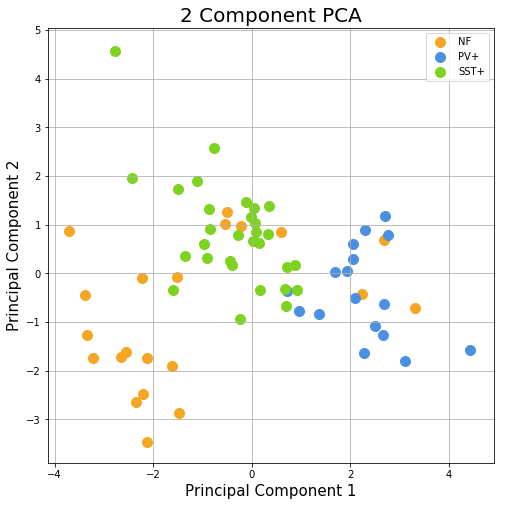

In [77]:
#2 component PCA plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


Fluorescence = ['NF', 'PV+', 'SST+']
colors = ['#F5A623', '#4A90E2', '#7ED321']
for target, color in zip(Fluorescence,colors):
    indicesToKeep = finalDf['Fluorescence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
ax.legend(Fluorescence)
ax.grid()
fig.savefig('ephys_2comp_pca'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

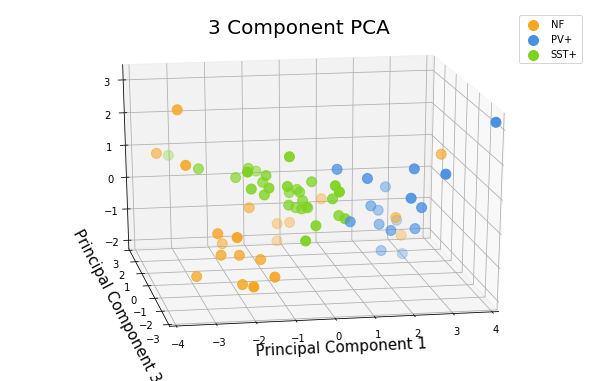

In [113]:
# 3 component PCA plot
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

Fluorescence = ['NF', 'PV+', 'SST+']
colors = ['#F5A623', '#4A90E2', '#7ED321']
for target, color in zip(Fluorescence,colors):
    indicesToKeep = finalDf['Fluorescence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 100)
    
plt.xlim(-4, 4) 
plt.ylim(-3, 3) 
ax.legend(Fluorescence)
ax.view_init(azim=-100, elev=20)

#ax.grid()
fig.savefig('ephys_3comp_pca'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

In [90]:
print ax.elev

30


In [79]:
#find how much variance 3 PCA components capture
pca.explained_variance_ratio_

array([0.44761372, 0.23399773, 0.1168542 ])

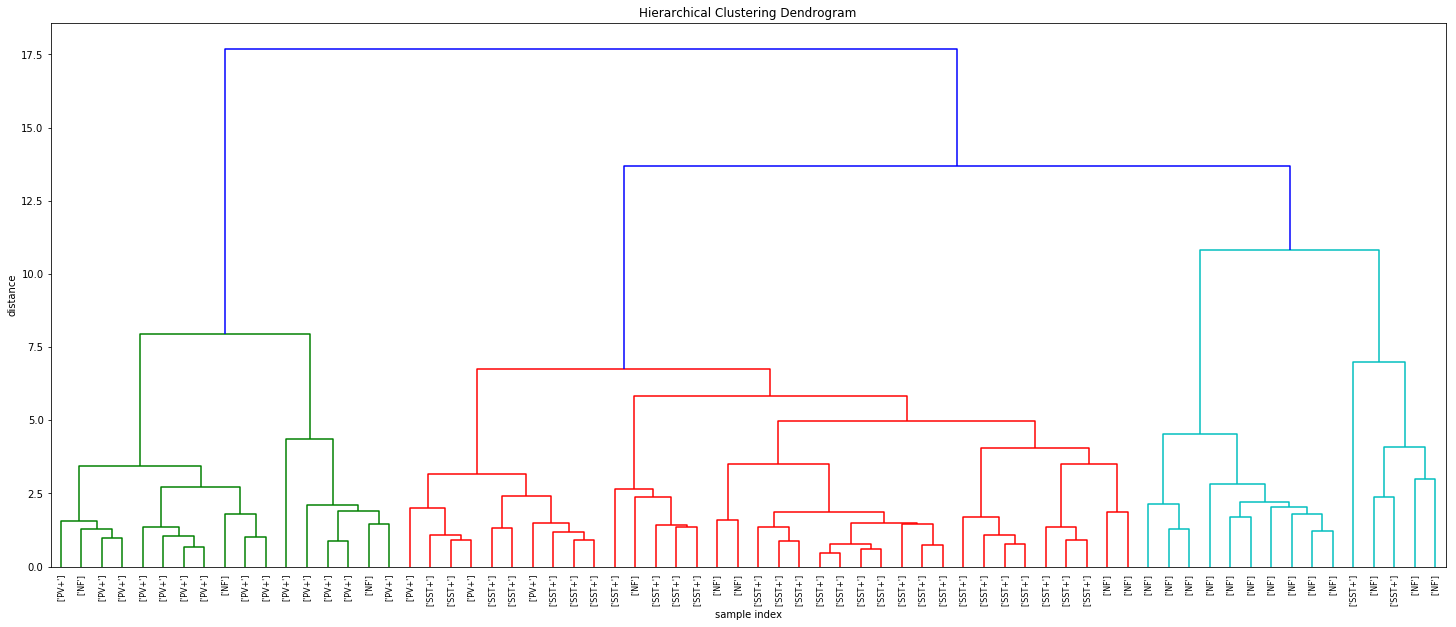

In [80]:
#ward's linkage dendrogram
Z = linkage(x, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=y
)
plt.savefig('ephys_dendrogram_wardlink'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')
plt.show()

In [81]:
# Check cophenetic correlation coefficient to compare actual pairwise distances of samples to hierarchical clusters
# closer to 1 means clustering preserves original distances

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(x))
c

0.6265390257782427

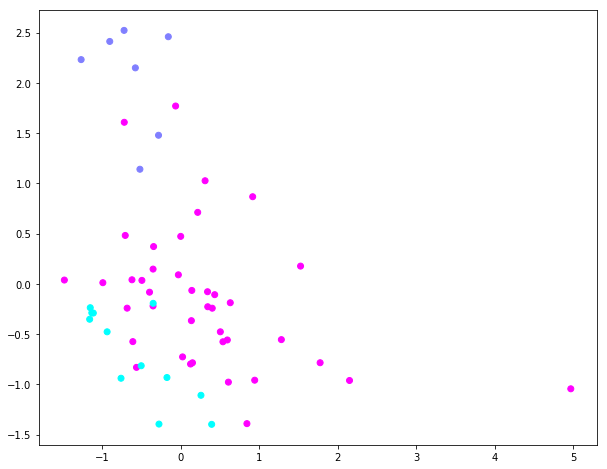

In [31]:
# Forms flat clusters from the hierarchical clustering defined by the linkage matrix
k = 3
clusters = fcluster(Z, k, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(x[:,0], x[:,1], c=clusters, cmap='cool')  # plot points with cluster dependent colors
plt.show()
plt.savefig('ephys_fclusters'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

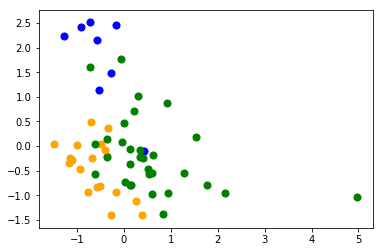

In [52]:
# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'orange')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'purple')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.savefig('ephys_kmeans_clusters'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')

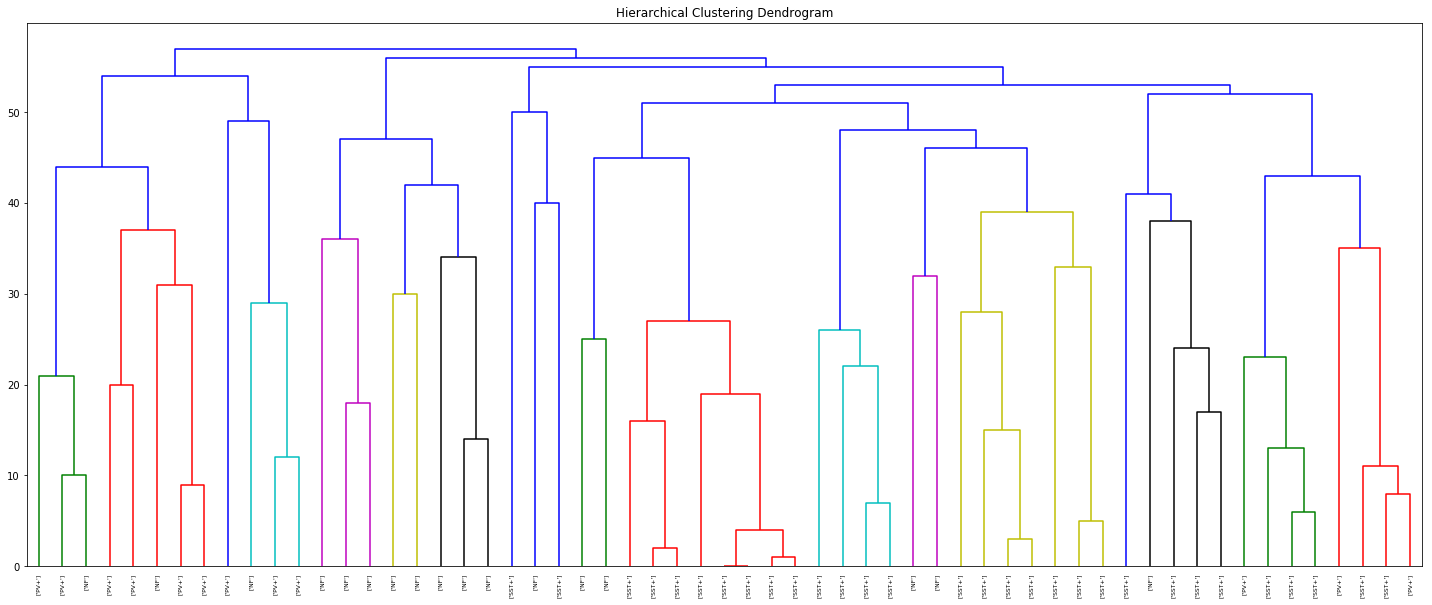

In [34]:
#dendorgram analysis and plot
#used 'x' data set which is the standardized data of ephys features (accounts for nan entries)

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(3, children.shape[0]+3)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(n_clusters=3)

model = model.fit(x)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=y)
plt.savefig('ephys_dendrogram'+(time.strftime("%d-%m-%Y-%H-%M-%S"))+'.svg')